* Created By: Blessy Louis (2348416) 4MDS'B'
* Created On : 24.07.2024

## **Lab Exercise 3:**
* Evaluating Influence: Calculate centrality measures on a social network dataset.Analyze results to identify important nodes.**


## **Transportation and logistics**

# **Import Libraries**



The `import pandas as pd` statement imports the Pandas library under the alias `pd`, allowing Python code to use Pandas functions and classes. Pandas is a powerful data manipulation and analysis library in Python, providing data structures like DataFrame and Series for handling structured data efficiently.

`import networkx as nx` imports the NetworkX library under the alias `nx`. NetworkX is a Python package for the creation, manipulation, and study of complex networks of nodes and edges. It offers tools for analyzing network structures, computing network properties, and performing graph algorithms.

`import matplotlib.pyplot as plt` imports the Pyplot module from the Matplotlib library under the alias `plt`. Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Pyplot provides a MATLAB-like plotting interface, making it easy to generate various types of plots such as line plots, histograms, scatter plots, etc.




In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

##**Data Description**
# **Souce:**https://www.kaggle.com/code/sasakitetsuya/indian-cities-network-analysis/input

This CSV file contains three features: Origin city, Destination city and Distance between them (via road). It can be used for a wide range of path/route-finding programs.

* Origin: This column specifies the origin (start) city.
* Destination: This column specifies the destination (final) city.
* Distance: This column contains round off distance (in km) between the Origin and Destination cities.

In [18]:
# Step 1: Load the dataset
df = pd.read_csv('indian-cities-dataset.csv')
print("Unique Values Origin",df['Origin'].unique())
print("Unique Values of Destination",df['Destination'].unique())
print("Head of the dataset",df.head())

Unique Values Origin ['Agra' 'Ahmedabad' 'Bengaluru' 'Bhubaneswar' 'Chennai' 'Delhi' 'Goa'
 'Hyderabad' 'Jaipur' 'Kanpur' 'Kochi' 'Kolkata' 'Lucknow' 'Mumbai'
 'Patna' 'Pune' 'Udaipur' 'Varanasi' 'Vishakhapatnam']
Unique Values of Destination ['Delhi' 'Lucknow' 'Kanpur' 'Mumbai' 'Pune' 'Jaipur' 'Udaipur' 'Hyderabad'
 'Chennai' 'Goa' 'Kolkata' 'Vishakhapatnam' 'Patna' 'Bengaluru' 'Kochi'
 'Agra' 'Thiruvananthapuram' 'Ahmedabad' 'Varanasi' 'Bhubaneswar']
Head of the dataset       Origin Destination  Distance
0       Agra       Delhi       240
1       Agra     Lucknow       334
2       Agra      Kanpur       277
3  Ahmedabad      Mumbai       526
4  Ahmedabad        Pune       663


In [19]:
df.shape

(83, 3)

In [20]:
df.isnull().sum()

Origin         0
Destination    0
Distance       0
dtype: int64

In [8]:
df=df.dropna

Creating Graph

In [21]:

# Step 1: Create the graph
G = nx.Graph()

# Add nodes and edges to the graph
for _, row in df.iterrows():
    origin = row['Origin']
    destination = row['Destination']
    distance = row['Distance']

    # Add nodes
    G.add_node(origin)
    G.add_node(destination)

    # Add edge with distance as weight
    G.add_edge(origin, destination, weight=distance)



### Graph Architecture

**1. Nodes**:
- Represent cities.
- Each unique city from the `Origin` and `Destination` columns in the dataset becomes a node in the graph.

**2. Edges**:
- Represent road connections between cities.
- Each row in the dataset defines an edge between two nodes (cities).
- The `Distance` column specifies the weight of the edge, indicating the road distance between the two cities.

### Conversion Process

1. **Initialize Graph**:
   - Use an undirected graph structure (`nx.Graph()`).

2. **Add Nodes**:
   - Extract city names from both `Origin` and `Destination` columns.
   - Add each city as a node in the graph.

3. **Add Edges**:
   - For each row, create an edge between the `Origin` and `Destination` nodes.
   - Use the `Distance` value as the weight of the edge.

**Summary**: The dataset is converted into a graph where nodes are cities and edges are road connections with distances as weights.

Visualize the graph

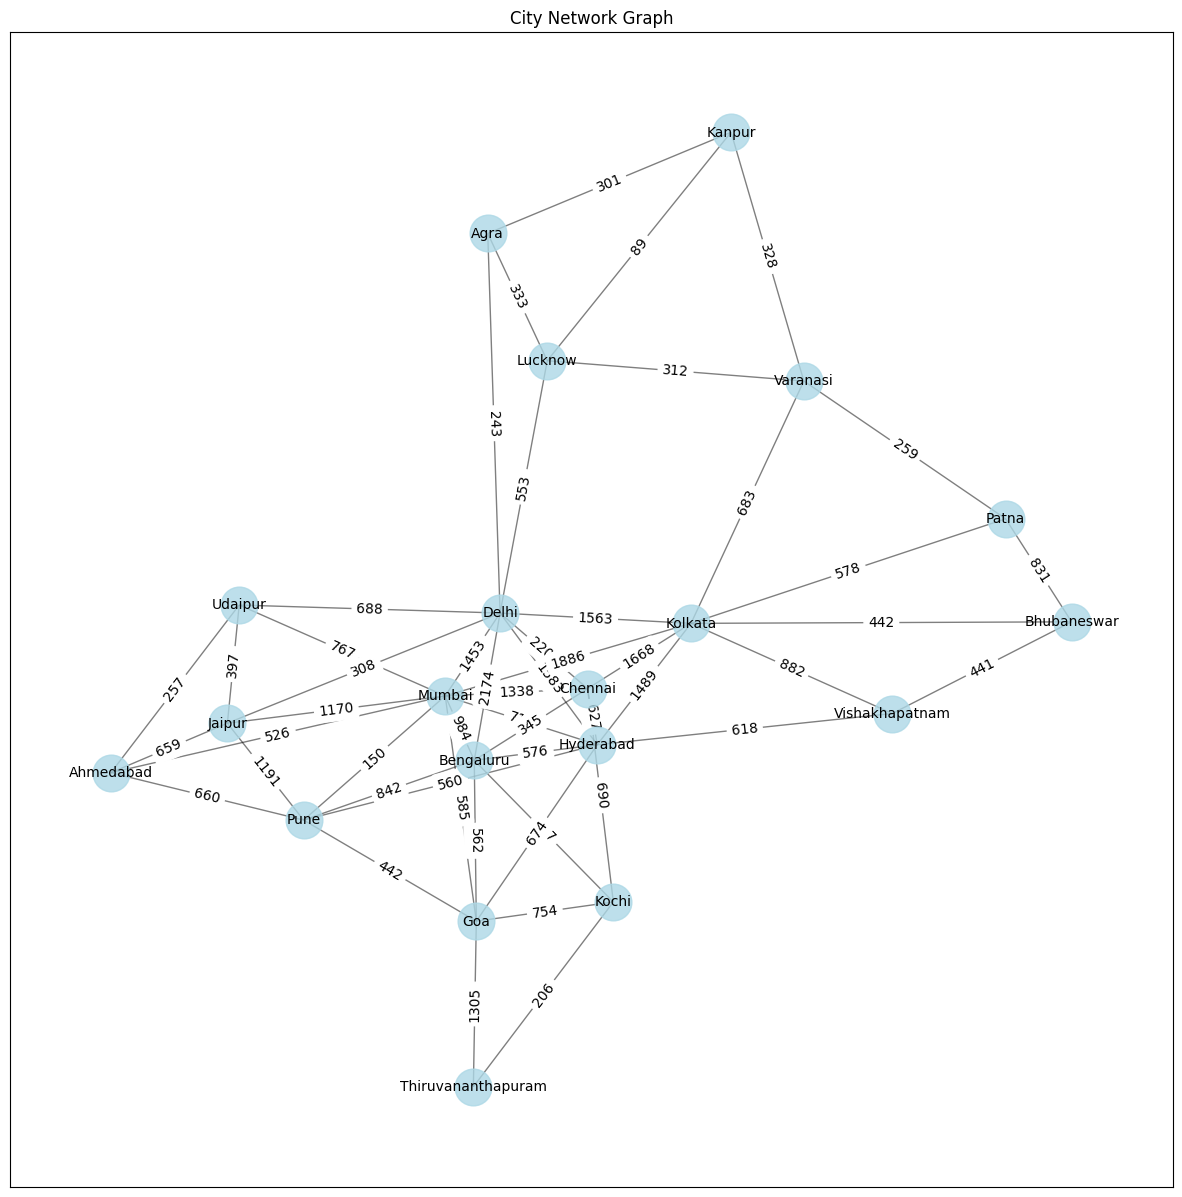

In [22]:
# Step 2: Visualize the graph
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G, k=0.5)  # Adjust 'k' for layout

# Draw the graph with edge labels for distances
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=700, alpha=0.8)
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

# Draw edge labels for distances
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("City Network Graph")
plt.show()

 Calculating Centrality measures

In [25]:
# Step 2: Calculate centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)


# Display centrality measures for each node
def display_centrality(centrality, title):
    print(f"\n{title}:")
    for node, value in centrality.items():
        print(f"{node}: {value:.4f}")

# Display centrality measures
display_centrality(degree_centrality, "Degree Centrality")
display_centrality(betweenness_centrality, "Betweenness Centrality")
display_centrality(closeness_centrality, "Closeness Centrality")



Degree Centrality:
Agra: 0.1579
Delhi: 0.4737
Lucknow: 0.2105
Kanpur: 0.1579
Ahmedabad: 0.2105
Mumbai: 0.5263
Pune: 0.3158
Jaipur: 0.2632
Udaipur: 0.2105
Bengaluru: 0.3684
Hyderabad: 0.4211
Chennai: 0.3158
Goa: 0.3158
Bhubaneswar: 0.1579
Kolkata: 0.4211
Vishakhapatnam: 0.1579
Patna: 0.1579
Kochi: 0.2105
Thiruvananthapuram: 0.1053
Varanasi: 0.2105

Betweenness Centrality:
Agra: 0.0292
Delhi: 0.2661
Lucknow: 0.0420
Kanpur: 0.0049
Ahmedabad: 0.0019
Mumbai: 0.1810
Pune: 0.0286
Jaipur: 0.0150
Udaipur: 0.0075
Bengaluru: 0.0517
Hyderabad: 0.1148
Chennai: 0.0651
Goa: 0.0875
Bhubaneswar: 0.0029
Kolkata: 0.2613
Vishakhapatnam: 0.0095
Patna: 0.0078
Kochi: 0.0268
Thiruvananthapuram: 0.0000
Varanasi: 0.0537

Closeness Centrality:
Agra: 0.4318
Delhi: 0.6333
Lucknow: 0.4524
Kanpur: 0.3519
Ahmedabad: 0.4318
Mumbai: 0.6552
Pune: 0.4872
Jaipur: 0.4750
Udaipur: 0.4634
Bengaluru: 0.5429
Hyderabad: 0.6129
Chennai: 0.5758
Goa: 0.4872
Bhubaneswar: 0.4043
Kolkata: 0.6129
Vishakhapatnam: 0.4419
Patna: 0.4222


# **Interpretation**

### 1. **Degree Centrality**

**Definition**: Degree centrality measures the number of direct connections (edges) a node (city) has. Higher values indicate a node is more connected to other nodes.

**Interpretation**:
- **Mumbai** (0.5263) has the highest degree centrality, meaning it has the most direct connections to other cities.
- **Delhi** (0.4737) and **Hyderabad** (0.4211) also have high degree centralities, indicating strong connectivity.
- **Thiruvananthapuram** (0.1053) has the lowest degree centrality, indicating it has fewer direct connections compared to other cities.

### 2. **Betweenness Centrality**

**Definition**: Betweenness centrality measures how often a node lies on the shortest path between other nodes. Higher values suggest that a node plays a key role in connecting different parts of the network.

**Interpretation**:
- **Delhi** (0.2661) has the highest betweenness centrality, meaning it is crucial in connecting other cities and has a significant role in the network's flow.
- **Mumbai** (0.1810) and **Kolkata** (0.2613) also have high betweenness centralities, indicating their important positions in the network.
- **Thiruvananthapuram** (0.0000) has the lowest betweenness centrality, suggesting it has little influence on connecting other cities.

### 3. **Closeness Centrality**

**Definition**: Closeness centrality measures how close a node is to all other nodes in the network. Higher values indicate a node can reach all other nodes more quickly, representing overall accessibility.

**Interpretation**:
- **Mumbai** (0.6552) has the highest closeness centrality, indicating it can reach other cities more quickly than others and is generally more accessible.
- **Delhi** (0.6333) and **Hyderabad** (0.6129) also have high closeness centralities, indicating good accessibility.
- **Thiruvananthapuram** (0.3455) has the lowest closeness centrality, meaning it is less accessible compared to other cities.


Visualize the centrality measures


Top 5 Nodes by Degree Centrality:
Mumbai: 0.5263
Delhi: 0.4737
Hyderabad: 0.4211
Kolkata: 0.4211
Bengaluru: 0.3684


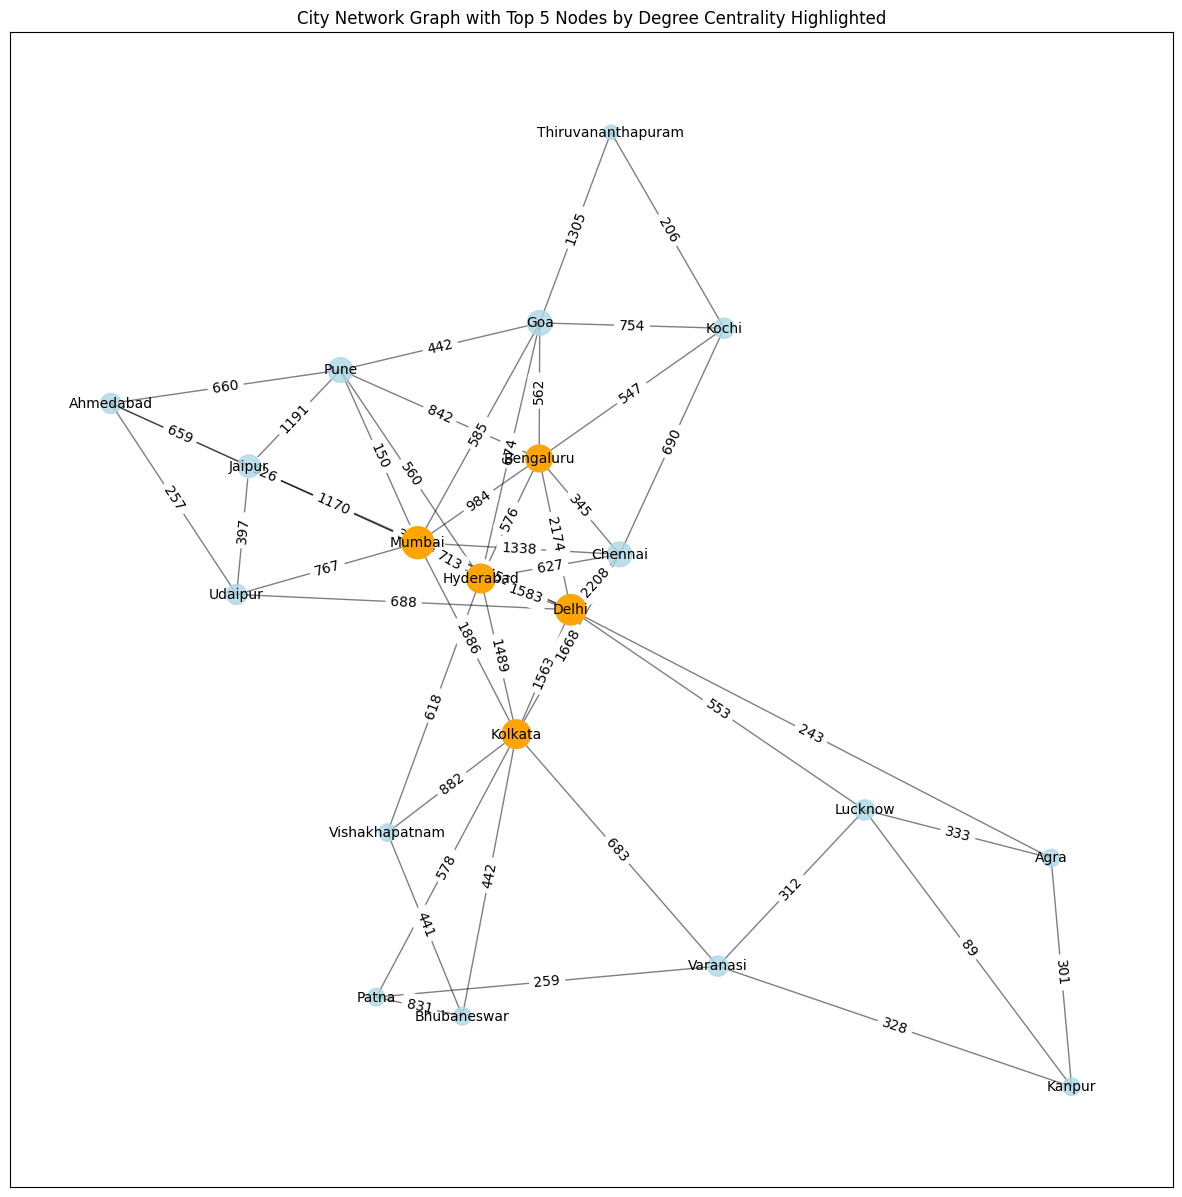


Top 5 Nodes by Betweenness Centrality:
Delhi: 0.2661
Kolkata: 0.2613
Mumbai: 0.1810
Hyderabad: 0.1148
Goa: 0.0875


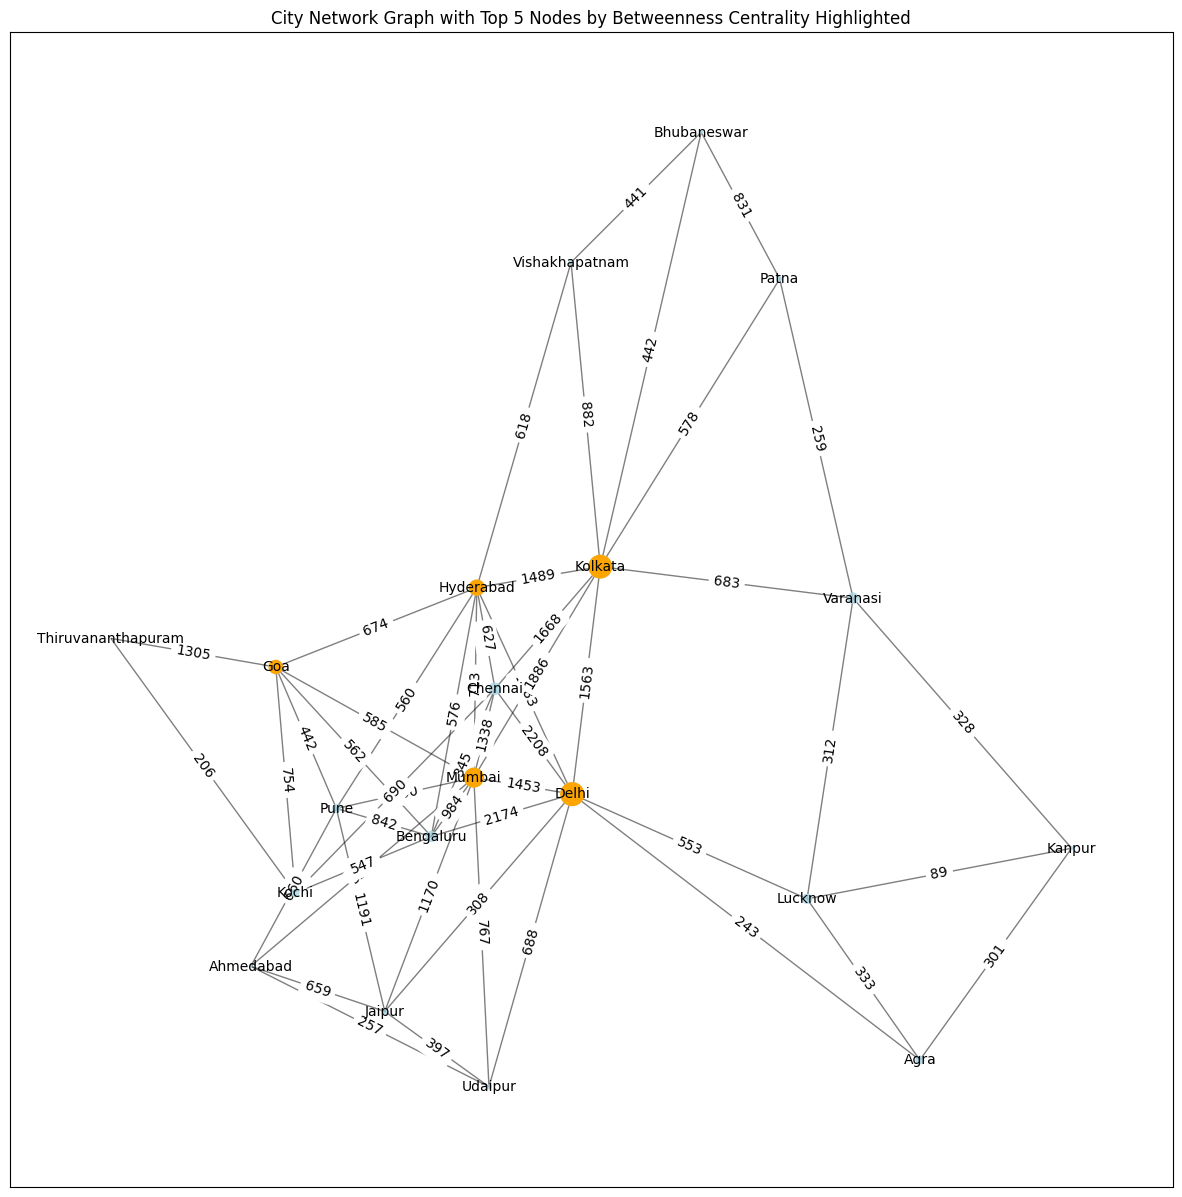


Top 5 Nodes by Closeness Centrality:
Mumbai: 0.6552
Delhi: 0.6333
Hyderabad: 0.6129
Kolkata: 0.6129
Chennai: 0.5758


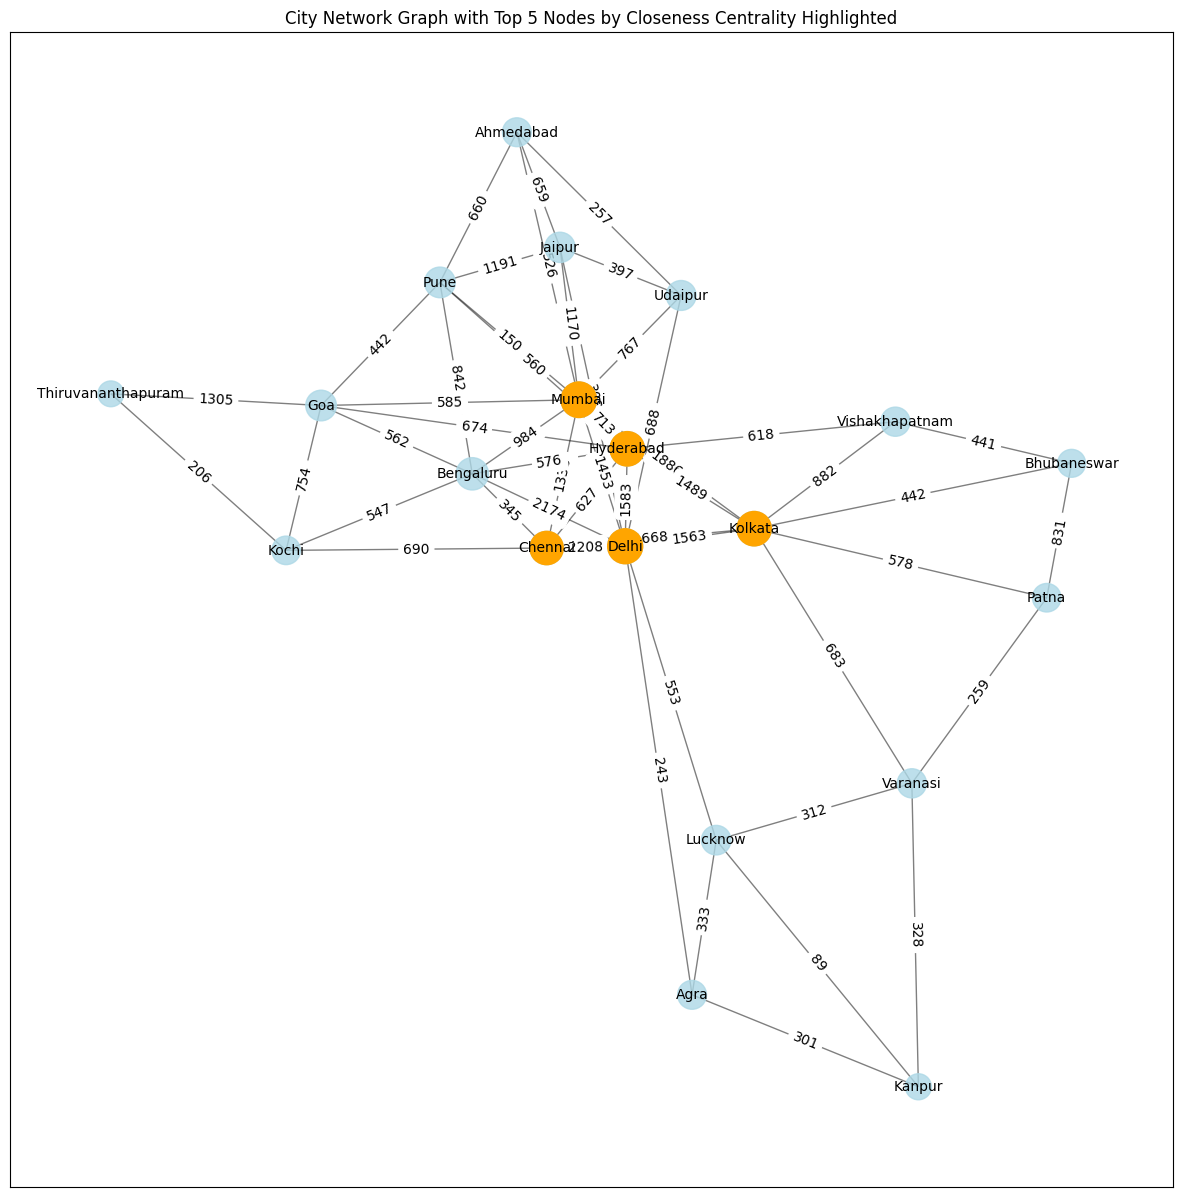

In [26]:

# Function to highlight top 5 nodes based on centrality
def highlight_top_centrality(centrality, title):
    # Sort nodes by centrality and get top 5
    sorted_nodes = sorted(centrality.items(), key=lambda x: x[1], reverse=True)
    top_5_nodes = dict(sorted_nodes[:5])

    # Print top 5 nodes
    print(f"\nTop 5 Nodes by {title}:")
    for node, value in top_5_nodes.items():
        print(f"{node}: {value:.4f}")

    return top_5_nodes
# Function to visualize centrality measures with highlighted top nodes
def visualize_centrality_with_highlights(centrality, top_nodes, title):
    plt.figure(figsize=(15, 15))
    pos = nx.spring_layout(G, k=0.5)  # Adjust 'k' for layout

    # Node sizes based on centrality
    node_size = [v * 1000 for v in centrality.values()]  # Scale up for visualization

    # Draw the graph
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color='lightblue', alpha=0.8)

    # Highlight top nodes
    top_node_color = 'orange'
    nx.draw_networkx_nodes(G, pos, nodelist=top_nodes.keys(), node_color=top_node_color, node_size=[v * 1000 for v in top_nodes.values()])

    # Draw node labels
    nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

    # Draw edge labels for distances
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.title(f"City Network Graph with Top 5 Nodes by {title} Highlighted")
    plt.show()

# Highlight and visualize each centrality measure
top_degree_nodes = highlight_top_centrality(degree_centrality, "Degree Centrality")
visualize_centrality_with_highlights(degree_centrality, top_degree_nodes, "Degree Centrality")

top_betweenness_nodes = highlight_top_centrality(betweenness_centrality, "Betweenness Centrality")
visualize_centrality_with_highlights(betweenness_centrality, top_betweenness_nodes, "Betweenness Centrality")

top_closeness_nodes = highlight_top_centrality(closeness_centrality, "Closeness Centrality")
visualize_centrality_with_highlights(closeness_centrality, top_closeness_nodes, "Closeness Centrality")





## **Interpretation**

- **Degree Centrality**: Identifies which cities are the most connected.
- **Betweenness Centrality**: Highlights cities that are key connectors in the network.
- **Closeness Centrality**: Shows which cities are most accessible from all other cities.

**Top Cities Based on Centrality Measures**:
- **Degree Centrality**: Mumbai, Delhi, Hyderabad
- **Betweenness Centrality**: Delhi, Mumbai, Kolkata
- **Closeness Centrality**: Mumbai, Delhi, Hyderabad

Each centrality measure provides different insights into the roles and importance of cities within the network. Combining these measures gives a comprehensive view of the network's structure and the relative importance of each city.

# **Conclusion**

This assignment involved converting a dataset of cities and road distances into a graph and analyzing it using centrality measures. The dataset, consisting of columns for `Origin`, `Destination`, and `Distance`, was transformed into an undirected graph where nodes represent cities and edges represent roads with weights corresponding to distances. The analysis focused on three centrality measures to understand the roles of different cities in the network. Degree centrality highlighted cities with the most direct connections, such as Mumbai, Delhi, and Hyderabad, identifying them as key hubs. Betweenness centrality revealed cities crucial for connecting different parts of the network; Delhi, Mumbai, and Kolkata were prominent in this regard, serving as important intermediaries in many shortest paths. Closeness centrality showed which cities are most accessible from others, with Mumbai, Delhi, and Hyderabad ranking highest, indicating they can reach other cities more quickly. Overall, these centrality measures provide a comprehensive view of the network's structure, highlighting the most influential and accessible cities in the graph.